**Polynomial Linear Regression**

P(x) = a0 + a1*x + a2*x^2 + a3*x^3 + a4*x^4 ...

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [3]:
df=pd.read_csv("polynomial.csv",sep=";") # read_csv ile yuklenmis olan csv yi okuttuk
df # gozlemlemek icin print ettik

,deneyim,maas
0,1,4500
1,2,5000
2,3,6000
3,4,8000
4,5,11000
5,6,15000
6,7,20000
7,8,30000
8,9,50000
9,10,100000


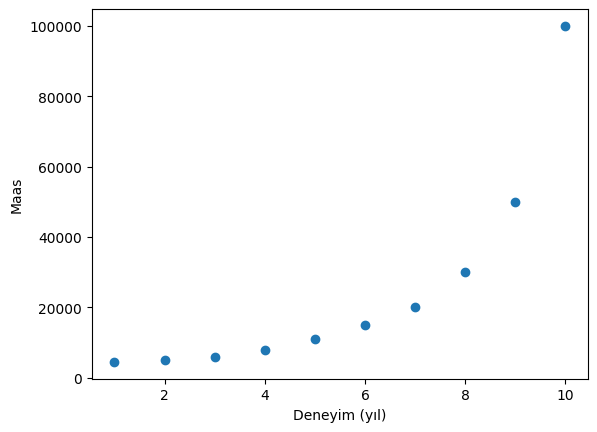

In [25]:
# Cizdirelim...
plt.scatter(df["deneyim"],df["maas"])
plt.xlabel("Deneyim (yıl)")
plt.ylabel("Maas")
plt.savefig("1.png",dpi=300)
plt.show()

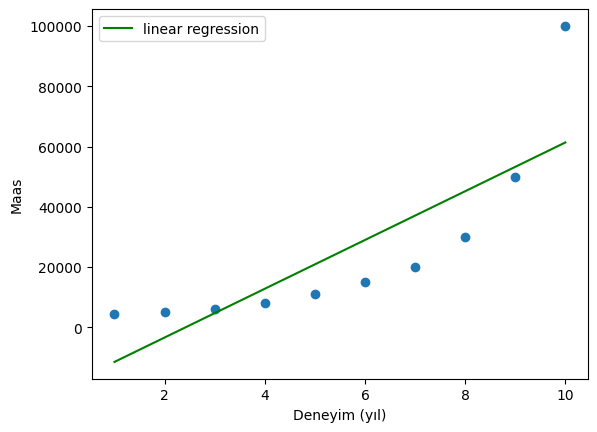

In [26]:
# goruldugu gibi veriler dogrusal olarak dagilmiyor.
# eger biz bu veri setine linear regression uygularsak hiç uygun olmayan bir tahmin cizgisi goruruz.,

reg=LinearRegression()
reg.fit(df[["deneyim"]],df["maas"])

plt.xlabel('Deneyim (yıl)')
plt.ylabel("Maas")

plt.scatter(df["deneyim"],df["maas"])

xline=df["deneyim"]
yline=reg.predict(df[["deneyim"]])

plt.plot(xline, yline, color="green", label="linear regression")

plt.legend()
plt.show()

**Tahmin için çok kötü bir doğru, bu veri seti için linear regression uygulamak doğru değildir. Veri setine göre model seçmek çok önemlidir.**

**Bu veri seti için polynomial regression uygulanması gerektiğine karar verdik.**

In [46]:
# x degerini polinom yukaridaki fonksiyonuna uyacak sekilde uyarlanmasını sagliyoruz.
# Yani -> 1, x, x^2 (N=2) seklinde...
# bu degeri grafige gore degistirebiliriz !!!
# bir adet polynomial regression nesnesi olusturmasi icin PolynomialFeatures fonksiyonunu cagiriyoruz.
# bu fonksiyonu cagirirken polinomun derecesini (N) belirtiyoruz.

polynomial_regression = PolynomialFeatures(degree=4)
# degree = N ...


# x sutununu x_polynomial'a donusturuyor. transform ve fit yapiyor yeni bir matris olusturuyor.
x_polynomial=polynomial_regression.fit_transform(df[["deneyim"]])

In [47]:
# regression model nesnemizi olan reg nesnemizi olusturup bunun fit metodunu cagirarak x_polynomial ve y eksenlerini fit ediyor
# yani regresyon modelimizi mevcut gercek verilere egitiyoruz

reg = LinearRegression()
reg.fit(x_polynomial,df["maas"])

LinearRegression()

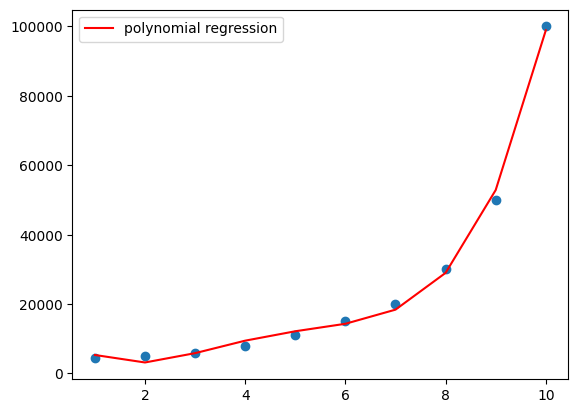

In [48]:
# artik model hazir ve egitilmis, simdi eldeki verilere gore modelimiz nasıl bir sonuc grafigi olusturuyor ?

y_head = reg.predict(x_polynomial)
plt.plot(df["deneyim"], y_head, color="red", label="polynomial regression")

plt.legend()

# veri setimizi de noktali olarak scatter edelim, polynomial reg uymus mu?
plt.scatter(df["deneyim"],df["maas"])
plt.show()

Goruldugu uzere uygunluk mevcut yani polynomial regression dogru bir secim. n=3 n=4 yaparak degisimi gozlemledik ve en uygun fit edilen degerde karar kildik.

In [50]:
# bu baglamda 4.5 yil deneyimi olan birinin tahmini maasinin kac olabilecegini tespit edelim...

x_polynomial1=polynomial_regression.fit_transform([[4.5]]) # cift parantez kullanma sebebi iki boyutlu array istiyor olmasi
reg.predict(x_polynomial1)

array([10958.21496211])